Test quadratic MMD two-sample test

In [80]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import freqopttest.glo as glo
import scipy.stats as stats
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
# sample source 
n = 500
dim = 10
alpha = 0.01
seed = 22

ss = data.SSGaussMeanDiff(dim, my=0.5)
#ss = data.SSSameGauss(d=dim)
#ss = data.SSGaussVarDiff(dim)
#ss = data.SSBlobs()
tst_data = ss.sample(n, seed=seed)
tr, te = tst_data.split_tr_te(tr_proportion=0.5, seed=10)


## Test Quadratic MMD

In [82]:
med = util.meddistance(tr.stack_xy(), 1000)
list_gwidth = np.hstack( ( (med**2) *(2.0**np.linspace(-4, 4, 20) ) ) )
list_gwidth.sort()
list_kernels = [kernel.KGauss(gw2) for gw2 in list_gwidth]
besti, powers = tst.QuadMMDTest.grid_search_kernel(tr, list_kernels, alpha)

med^2: 18.816
best width^2: 301.054


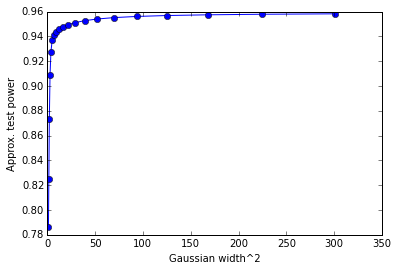

In [83]:
print 'med^2: %.3f'%med**2
print 'best width^2: %.3f'%(list_gwidth[besti])
plt.plot(list_gwidth, powers, 'o-')
plt.xlabel('Gaussian width^2')
plt.ylabel('Approx. test power')

In [84]:
k = kernel.KGauss(list_gwidth[besti])
mmd_test = tst.QuadMMDTest(k, n_permute=200, alpha=alpha)
test_result = mmd_test.perform_test(te)
test_result

{'alpha': 0.01,
 'h0_rejected': True,
 'list_permuted_mmd2': array([  4.37025556e-05,   1.63298159e-04,  -3.69756120e-05,
         -7.73741701e-05,  -2.43246608e-04,  -1.97527745e-04,
          4.02980117e-05,  -2.90391228e-04,  -1.92496005e-05,
         -2.30991666e-04,  -1.96227710e-04,   2.65258424e-04,
          2.30377112e-04,   3.61649146e-04,   3.12163935e-04,
         -2.09163697e-04,  -1.08441927e-04,  -1.01942115e-04,
         -5.94875256e-05,  -3.24379836e-04,  -2.26304561e-04,
         -2.47684427e-04,   1.37297751e-04,   4.42409624e-04,
         -1.13379025e-04,   4.47131575e-04,   2.49946022e-04,
          1.02804613e-04,  -3.30872105e-04,   6.01894110e-05,
          1.36015944e-04,   2.79157929e-04,  -5.11018890e-05,
          7.34100135e-05,  -1.18582198e-04,  -3.10451840e-04,
         -1.45135362e-04,   5.47991739e-05,  -1.68065617e-04,
         -1.13417748e-05,  -2.51429649e-04,   2.33609777e-05,
         -5.29862103e-05,   4.57575019e-05,  -2.29040404e-04,
         -

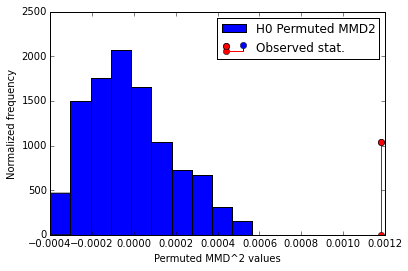

In [85]:
permuted_mmd2s = test_result['list_permuted_mmd2']
stat = test_result['test_stat']
bins = plt.hist(permuted_mmd2s, 10, normed=True, label='H0 Permuted MMD2');
plt.xlabel('Permuted MMD^2 values')
plt.ylabel('Normalized frequency')
plt.stem([stat], [max(bins[0])/2], 'or-', label='Observed stat.')
plt.legend()
